# Group - 3 : Deep Learning Project

# Weather class Prediction

In [1]:
#pip install opencv-python
#pip install pydot

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

### Creating directories

In [3]:
datadir =  "C:/Users/I Prashanth/Desktop/NMIMS/TRIM-3/Deep Learning/project/weather"
categories = ['cloudy','rain','sunrise']

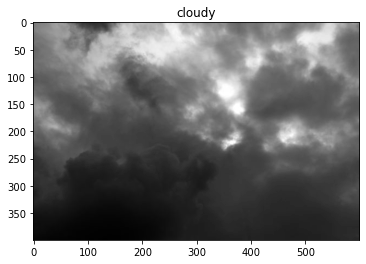

In [4]:
# Test code to check the dataset

for category in categories:
    path = os.path.join(datadir, category) # path to different weathers
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.title(category)
        plt.show()
        break
    break

In [5]:
print(img_array)

[[125 126 128 ... 149 146 145]
 [125 127 129 ... 146 144 142]
 [126 127 129 ... 141 139 138]
 ...
 [ 23  23  23 ...  55  55  56]
 [ 23  23  23 ...  54  55  55]
 [ 22  22  22 ...  54  54  55]]


In [6]:
print(img_array.shape)

(400, 600)


### Image Resizing

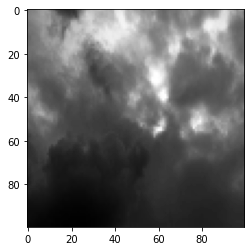

In [7]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Creating the training data

In [8]:
# Training data

training_data=[]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category) # path to different weathers
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [9]:
print(len(training_data))

871


### Shuffling the data

to get a proper distribution

In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
0
2
1
2
0
2
2
2
2


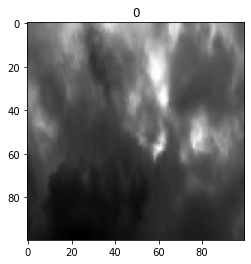

In [12]:
# Checking the shuffled data

plt.imshow(training_data[160][0],cmap='gray')
plt.title(training_data[160][1])
plt.show();

In [13]:
# Initialising x and y

x=[]
y=[]

In [14]:
for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
# Saving the data

np.save('data_x.npy',x)
np.save('data_y.npy',y)

In [16]:
# Loading the data_x

train_x=np.load('data_x.npy')
train_x[1]

array([[[149],
        [150],
        [148],
        ...,
        [154],
        [155],
        [156]],

       [[148],
        [149],
        [147],
        ...,
        [156],
        [155],
        [156]],

       [[146],
        [146],
        [145],
        ...,
        [157],
        [155],
        [156]],

       ...,

       [[ 13],
        [ 33],
        [ 28],
        ...,
        [  4],
        [  1],
        [  3]],

       [[ 11],
        [ 30],
        [ 24],
        ...,
        [  2],
        [  2],
        [  9]],

       [[ 27],
        [ 25],
        [ 23],
        ...,
        [  1],
        [  3],
        [ 18]]], dtype=uint8)

In [17]:
# Loading the data_y

train_y=np.load('data_y.npy')
train_y

array([1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1,
       1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2,

## Convolutional Nueral Network

In [18]:
# Normalisation

normalizer=tf.keras.layers.Normalization()

normalizer.adapt(train_x)

train_x=normalizer(train_x)

In [19]:
train_x[0]

<tf.Tensor: shape=(100, 100, 1), dtype=float32, numpy=
array([[[ 1.6482415 ],
        [ 1.7488483 ],
        [ 1.5644026 ],
        ...,
        [-0.3638937 ],
        [-0.22975135],
        [-0.5651072 ]],

       [[ 1.4637958 ],
        [ 1.4302603 ],
        [ 1.4805636 ],
        ...,
        [ 0.5247994 ],
        [-0.17944796],
        [ 0.30681807]],

       [[ 1.4637958 ],
        [ 1.4134924 ],
        [ 1.4134924 ],
        ...,
        [-0.26328695],
        [-0.5148038 ],
        [ 0.29005027]],

       ...,

       [[ 1.1787434 ],
        [ 1.1452078 ],
        [ 0.8936908 ],
        ...,
        [ 0.23974688],
        [ 0.34035364],
        [-0.68248177]],

       [[ 1.2625823 ],
        [ 1.3128856 ],
        [ 1.1452078 ],
        ...,
        [ 0.15590791],
        [-0.04530561],
        [-0.74955297]],

       [[ 1.0781366 ],
        [ 1.1955111 ],
        [ 1.0949044 ],
        ...,
        [ 0.25651467],
        [ 0.37388924],
        [-0.8669275 ]]], dtype=float32)

In [20]:
train_x.shape[1:]

TensorShape([100, 100, 1])

### Model Building

In [21]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=train_x.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))

#model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3)))
#model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3)))
model.add(tf.keras.layers.Activation('relu'))

#model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3)))
#model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flatten

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [22]:
# Compiling the model

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

Epoch 1/10
22/22 [==============================] - 13s 546ms/step - loss: 0.9139 - accuracy: 0.5862 - val_loss: 0.6367 - val_accuracy: 0.7029
Epoch 2/10
22/22 [==============================] - 12s 532ms/step - loss: 0.5995 - accuracy: 0.7486 - val_loss: 0.5123 - val_accuracy: 0.8000
Epoch 3/10
22/22 [==============================] - 11s 510ms/step - loss: 0.4303 - accuracy: 0.8190 - val_loss: 0.6172 - val_accuracy: 0.7086
Epoch 4/10
22/22 [==============================] - 12s 526ms/step - loss: 0.3621 - accuracy: 0.8678 - val_loss: 0.4199 - val_accuracy: 0.8629
Epoch 5/10
22/22 [==============================] - 11s 508ms/step - loss: 0.2067 - accuracy: 0.9325 - val_loss: 0.2769 - val_accuracy: 0.8971
Epoch 6/10
22/22 [==============================] - 12s 528ms/step - loss: 0.1169 - accuracy: 0.9612 - val_loss: 0.2868 - val_accuracy: 0.8857
Epoch 7/10
22/22 [==============================] - 11s 522ms/step - loss: 0.0642 - accuracy: 0.9842 - val_loss: 0.3323 - val_accuracy: 0.8971

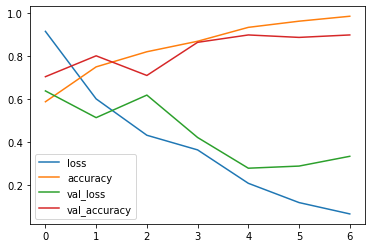

In [24]:
# Fitting the model

tf.random.set_seed(100)
hist=model.fit(train_x,train_y,epochs=10,validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist.history).plot();

Model metrics : Train loss: 0.0642 and Test loss/validation loss: 0.3322
            
Best model achieved, Overfitting is observed

### Saving the model

In [25]:
model.save('weather_class.model')

INFO:tensorflow:Assets written to: weather_class.model\assets


INFO:tensorflow:Assets written to: weather_class.model\assets


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

## Checking model prediction using the photos we clicked

In [28]:
# Predict data

def classify(filepath):
    IMG_SIZE=100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [29]:
# Loading the model

model=tf.keras.models.load_model('weather_class.model')

In [30]:
# Predicting

prediction = model.predict([classify('C:/Users/I Prashanth/Desktop/NMIMS/TRIM-3/Deep Learning/project/predict/sunrise_1.jpg')])
predict_index = np.argmax(prediction)
categories[predict_index]

1/1 [==============================] - 0s 127ms/step


'sunrise'

In [31]:
print(prediction)

[[0. 0. 1.]]


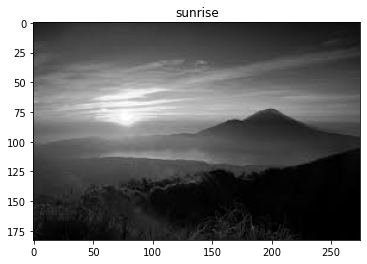

In [34]:
plt.imshow(cv2.imread('C:/Users/I Prashanth/Desktop/NMIMS/TRIM-3/Deep Learning/project/predict/sunrise_1.jpg', cv2.IMREAD_GRAYSCALE), cmap="gray")
plt.title(categories[predict_index])
plt.show();

## Thank You